In [97]:
# Imports and settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 8)

In [41]:
data = pd.read_csv('data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Tasks

---

1. How many males and females are in this dataset?

2. What is the average age of females?

3. What is percentage of German citizens?

4. Make a bar plot of people education

5. What are the age average values and age standard deviation of those who earns > $50K per year and those who earns less than?

6. Is it true that people who earn >$50K has, at least, bachelors?

7. Find out a statistics of age for every nationality and gender. Use `groupby` and `describe`. Find max age of males from Amer-Indian-Eskimo nationality.

8. Who earns more, single or married? More is > 50K. Married are those whose marital-status beggins with Married.

9. What is the maximum number of working hours per week? How many people works that hours and what is the percentage who earns >$50K among them?

10. Find out average working hours per week for those who earns less than 50K and those who earns more by each native-country.

## Dataset Information:

---

https://archive.ics.uci.edu/ml/datasets/Adult

Listing of attributes: 

`>50K, <=50K`

**age**: continuous

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

**fnlwgt**: continuous

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

**education-num**: continuous

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

**sex**: Female, Male 

**capital-gain**: continuous

**capital-loss**: continuous

**hours-per-week**: continuous

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

### Understand the Data

---

In [42]:
# We have 32K entries with 15 attributes
data.shape

(32561, 15)

In [43]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [46]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 1: How many males and females

In [47]:
data.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [59]:
males = data[data['sex'] == 'Male'].count()
females = data[data['sex'] == 'Female'].count()

In [60]:
mcount = males.mean()
mcount

21790.0

In [61]:
fcount = females.mean()
fcount

10771.0

In [63]:
mcount / fcount

2.0230247887846997

### 2: What is the average age of females?

In [52]:
females = data[data['sex'] == 'Female']

females['age'].mean()

36.858230433571627

### 3: What is percentage of German citizens?

In [71]:
data['native-country'].value_counts(normalize=True)['Germany']

0.0042074874850281012

### 4: Make a bar plot of people's education


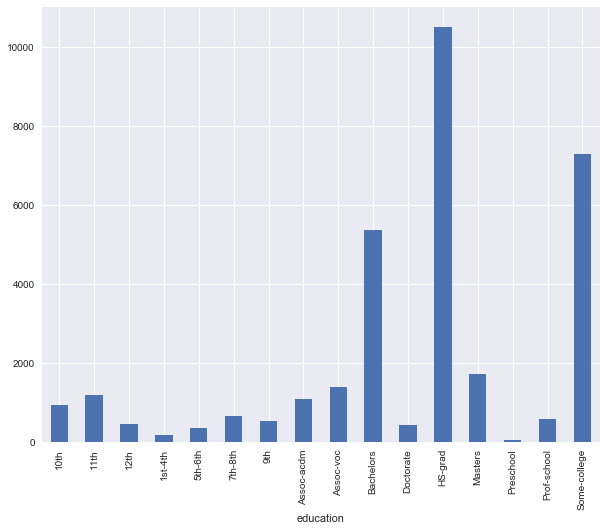

In [107]:
ed = data.sort_values(by='education', ascending=False)
ed = ed.groupby(by=['education'])['education']
ed.count().plot(kind='bar')

### 5: What are the age average values and age standard deviation of those who earns > $50K per year and those who earns less than?

In [113]:
earns_less = data[data['salary'] == '<=50K']
earns_more = data[data['salary'] != '<=50K']

In [120]:
# Mean
print(earns_less['age'].mean())
print(earns_more['age'].mean())

36.7837378641
44.2498405816


In [123]:
# Standard deviation
print(earns_less['age'].std())
print(earns_more['age'].std())

14.0200884908
10.5190277199


In [130]:
# Youngest well-earner
earns_more['age'].min()

19

In [139]:
# What percent of people earn more
1 - data['salary'].value_counts(normalize=True)['<=50K']

0.24080955744602439

### 6: Is it true that people who earn >$50K has, at least, bachelors?

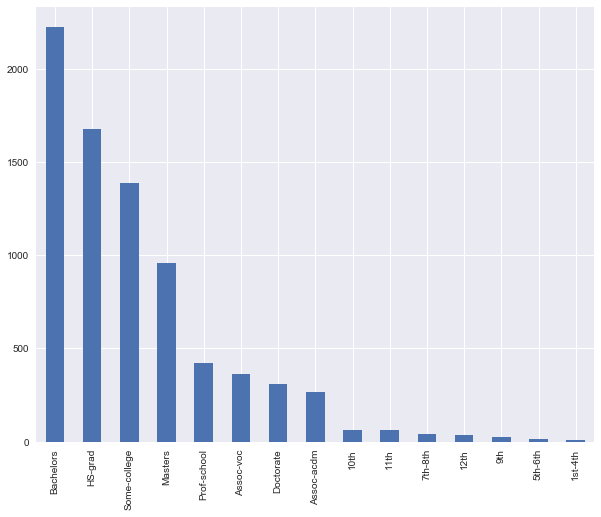

In [142]:
earns_more['education'].value_counts().plot('bar')

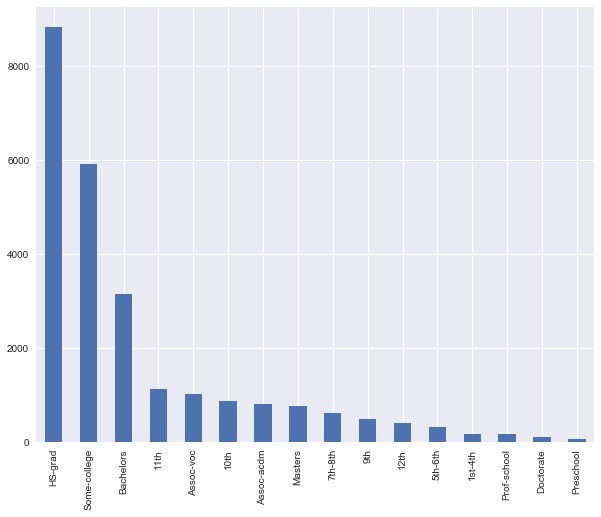

In [143]:
earns_less['education'].value_counts().plot('bar')

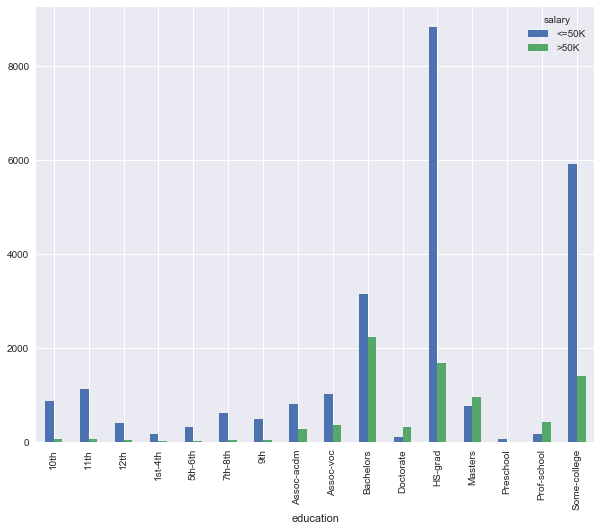

In [147]:
pd.crosstab(data['education'], data['salary']).plot(kind='bar')